# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output file (CSV):
output_data_file= 'output_data/cities.csv'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid=cff17a915e99f1c471bd0cc562caac39&units=meteric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']-273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | medford
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | punakha
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | buchanan
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | marsh harbour
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | ponta do sol
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,medford,42.3265,-122.8756,8.85,79,75,0.00,US,1670287671
1,hobart,-42.8794,147.3294,16.70,56,75,8.23,AU,1670287505
2,georgetown,5.4112,100.3354,27.35,92,20,1.03,MY,1670287415
3,busselton,-33.6500,115.3333,19.35,44,0,5.67,AU,1670287672
4,isangel,-19.5500,169.2667,31.06,74,20,1.54,VU,1670287672


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,medford,42.3265,-122.8756,8.85,79,75,0.00,US,1670287671
1,hobart,-42.8794,147.3294,16.70,56,75,8.23,AU,1670287505
2,georgetown,5.4112,100.3354,27.35,92,20,1.03,MY,1670287415
3,busselton,-33.6500,115.3333,19.35,44,0,5.67,AU,1670287672
4,isangel,-19.5500,169.2667,31.06,74,20,1.54,VU,1670287672
5,hithadhoo,-0.6000,73.0833,27.28,75,100,3.78,MV,1670287673
6,punakha,27.5837,89.8598,10.21,61,3,0.90,BT,1670287673
7,east london,-33.0153,27.9116,15.00,80,6,3.82,ZA,1670287673
8,saskylakh,71.9167,114.0833,-23.81,97,100,10.08,RU,1670287596


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

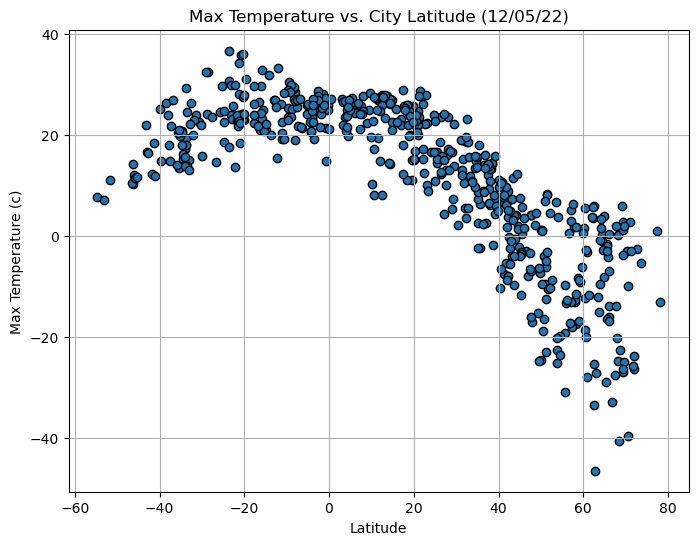

In [28]:

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(city_data_df["Date"][0])) 

# Incorporate the other graph properties
plt.grid()
plt.title(f"Max Temperature vs. City Latitude ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

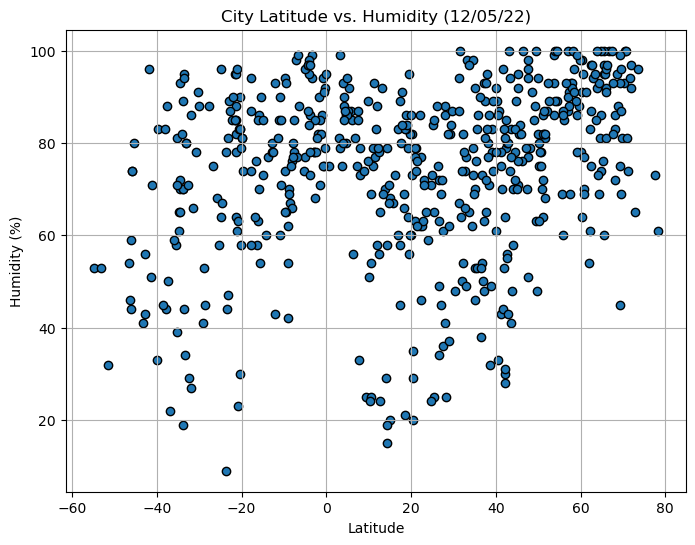

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(city_data_df["Date"][0]))

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Humidity ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

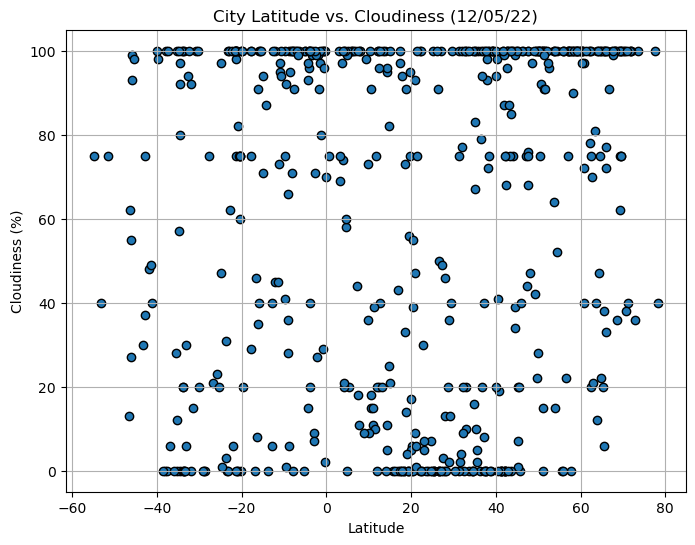

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(city_data_df["Date"][0]))

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


     

#### Latitude vs. Wind Speed Plot

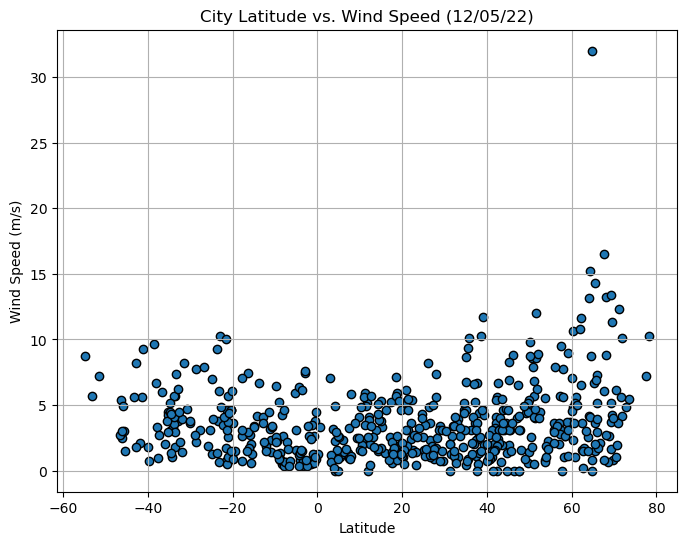

In [31]:

# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"],edgecolors="black")
dateofplot = time.strftime("%D", time.localtime(city_data_df["Date"][0]))

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({dateofplot})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linreg(lat,vs,ylabel,xx,yy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(lat, vs)
    regress_value = lat * slope + intercept
    eqtn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize=(8, 6))
    plt.scatter(x=lat, y=vs, edgecolors="black")
    plt.plot(lat, regress_value, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.annotate(eqtn,(xx,yy),fontsize=15,color="red")
    print(f"The r-value is : {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,medford,42.3265,-122.8756,8.85,79,75,0.00,US,1670287671
2,georgetown,5.4112,100.3354,27.35,92,20,1.03,MY,1670287415
6,punakha,27.5837,89.8598,10.21,61,3,0.90,BT,1670287673
8,saskylakh,71.9167,114.0833,-23.81,97,100,10.08,RU,1670287596
10,buchanan,5.8808,-10.0467,25.40,87,100,1.28,LR,1670287674


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hobart,-42.8794,147.3294,16.70,56,75,8.23,AU,1670287505
3,busselton,-33.6500,115.3333,19.35,44,0,5.67,AU,1670287672
4,isangel,-19.5500,169.2667,31.06,74,20,1.54,VU,1670287672
5,hithadhoo,-0.6000,73.0833,27.28,75,100,3.78,MV,1670287673
7,east london,-33.0153,27.9116,15.00,80,6,3.82,ZA,1670287673


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.693560973652074


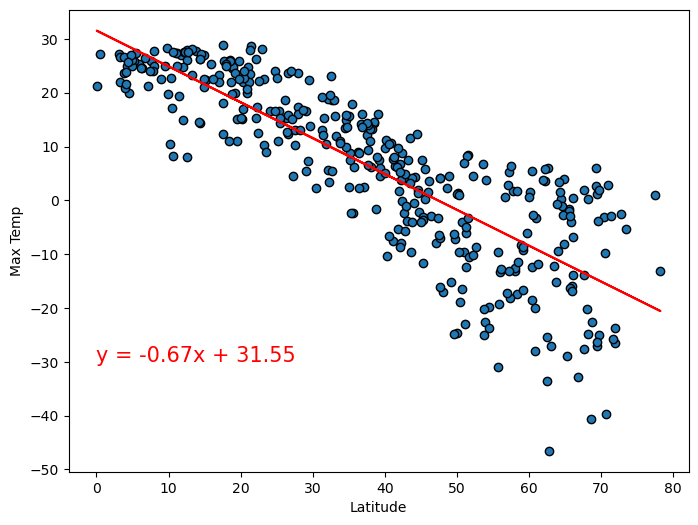

In [18]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",0,-30)


The r-value is : 0.31536982324447005


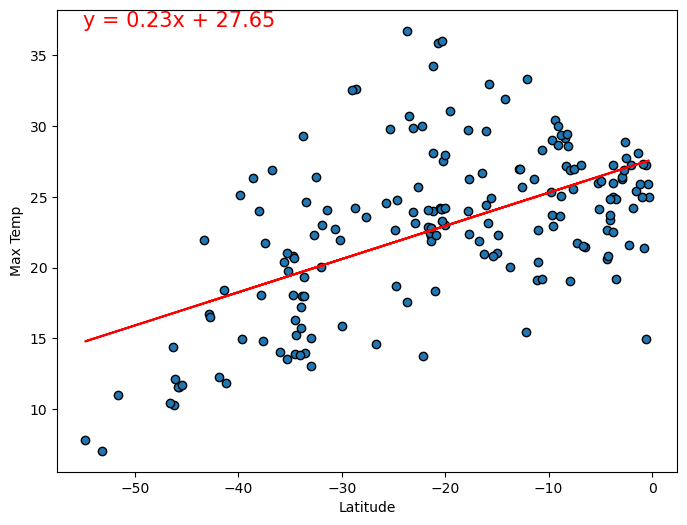

In [19]:
# Linear regression on Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",-55,37)

**Discussion about the linear relationship:** 
- In conclusion, by looking at the 2 scatterplots above we can notice that on Northern Hemisphere for greater latitudes, the maximum temperature decreases as latitude increases. On the other hand, for southern hemisphere, the maximum temperature increases as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.09893526158976496


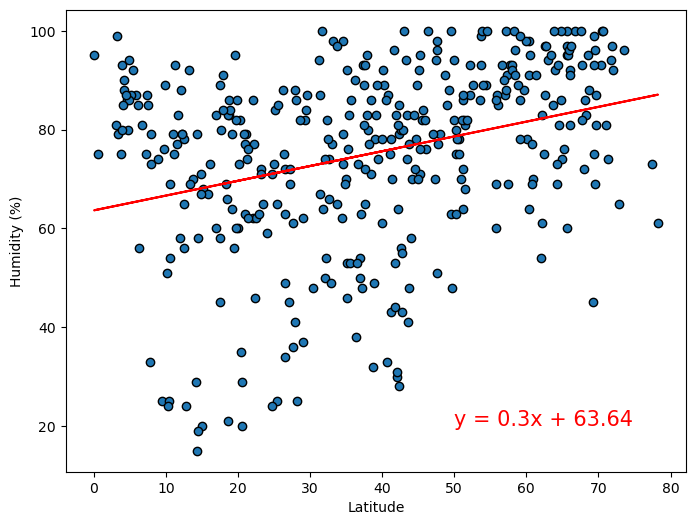

In [20]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity (%)",50,20)

The r-value is : 0.1867312741456751


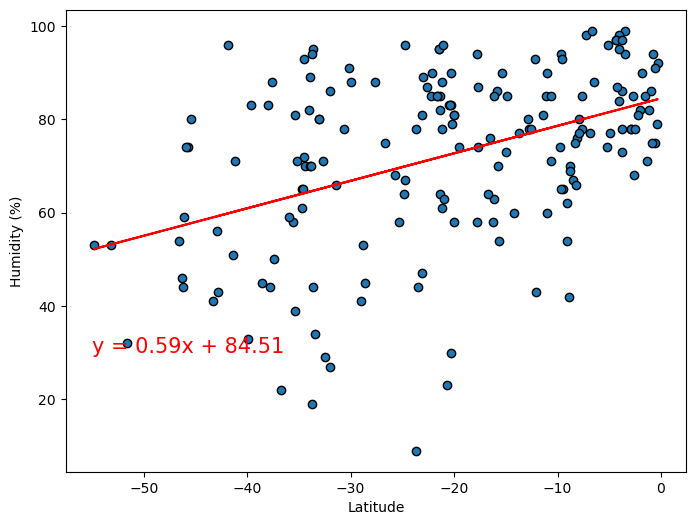

In [21]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity (%)",-55,30)


**Discussion about the linear relationship:** 

- The 2 regression plot above shows that The humidity generally increase with the latitude in both southern and northern hemisphere. but also the relationship between the latitude and humidity is always going to be direct, doesn't matter if the city is on Northern or the Southern Hemisphere.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.08922214796781179


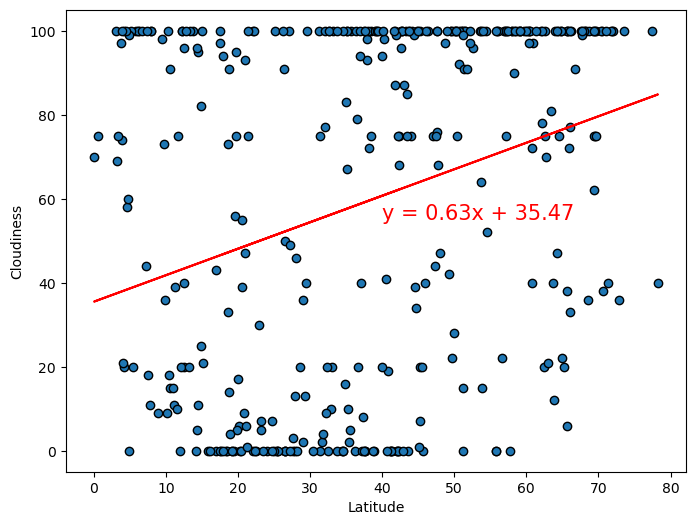

In [22]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",40,55)


The r-value is : 0.055619462059208716


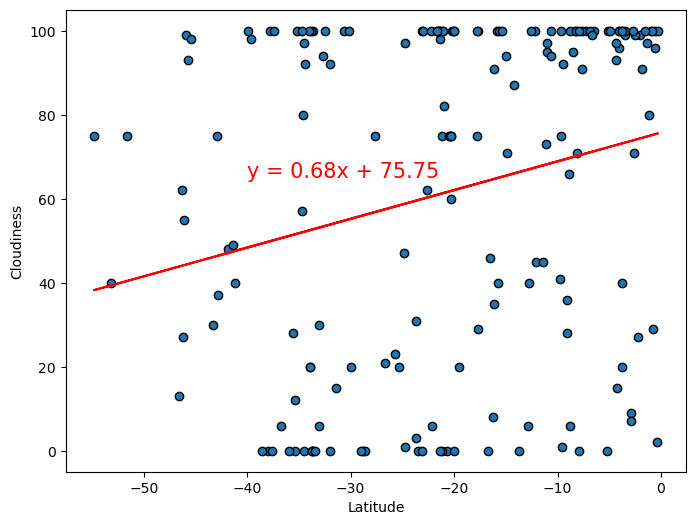

In [23]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",-40,65)


**Discussion about the linear relationship:** 

- The above graph can see that the relation with latitude and cloudiness for northern hemisphere has a weak relationship, As per the for southern hemisphere has a weak relation, but higher latitude along with more cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.10312375833346311


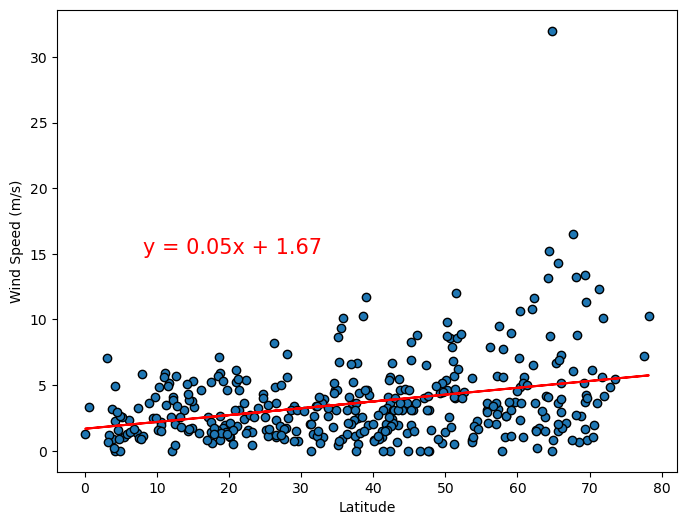

In [24]:
# Northern Hemisphere
linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed (m/s)",8,15)


The r-value is : 0.1319993942519352


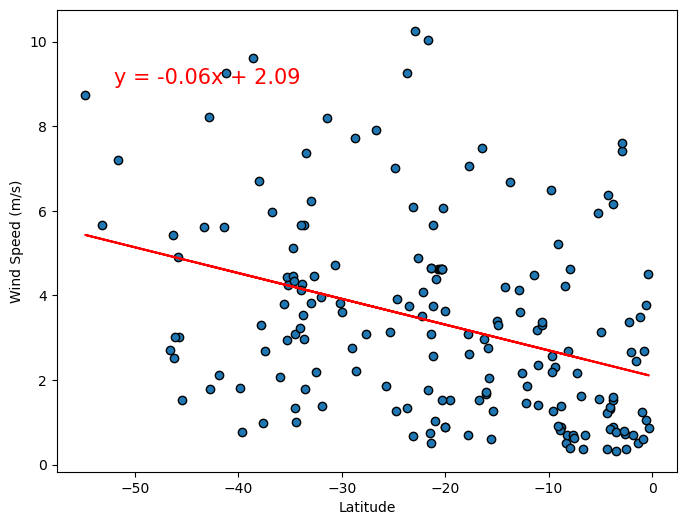

In [25]:
# Southern Hemisphere
linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed (m/s)",-52,9)


**Discussion about the linear relationship:** 
- For Northern hemisphere, the wind speed increases with increasing latitude.
- For Southern hemisphere, the wind speed decreases with increasing latitude.